# 전처리


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import platform
import warnings
import pickle
import re


In [ ]:
df = pd.read_csv('/content/real_df.csv')

# 수익계산을 위한 정리
* 단순히 조회수 보다, 물론 조회수가 수익률을 보는데 가장 크지만 광고의 유무도 봐야한다.
* 현재 (나무위키,2023) 기준을 보면 영상의 길이가 8분 이상인경우 중간광고를 넣을 수 있다. (최소 2개)

* 왁타버스의 경우, 커버곡 영상이 주로 있는데, 이는 원곡자의 허락을 받지 않는이상 수익화하기는 어렵다. 흠.. 제외해야하나? 포함했을 때와 제외 했을때를 구해봐야겠다.

### 쇼츠의 경우? (2022 기준)
* 30초 이상, 1분 미만의 쇼츠 영상을 올렸을 경우 5초 광고, 또는 범퍼 광고가 붙는다.

* 기타(구글, 다음, 네이버 등) 외부 소스로 들어오거나, 크리에이터의 채널을 통해 들어오거나, 트래픽 소스가 유튜브 홈 화면에 뜨거나 하면 1분 미만의 쇼츠 영상으로 광고 수익을 얻을 수 있다. 이ㅣ건 다른것도 마찬가지 일듯?

## 광고를 안볼 수도 있다.
 유튜브 영상에 광고가 붙는다고 해서, 사람들이 해당 영상을 볼 때마다 광고가 붙는 것이 아니다.  어느 정도 시간 간격을 두고 광고를 사람들에게 노출된다.


> 또한 광고가 2개 있고 조회수가 100 이라고 해서 광고를 200번 봤다고 할 수는 없다. 왜냐면 광고가 뜨기도 전에 영상을 이탈하는 사람이 있기 때문,
실제로 youtube analytics 를 보면 (채널장만 볼 수 있는) 이탈률 광고를 본 횟수까지 확인할 수 있지만, 외부인은 볼 수 없다.. 얼만큼 봤는지 모른다. 한계점이 있으니 일단 보수적으로 계산할 필요가 있다.

> 게다가 유튜브 프리미엄 이용자도 생각을 해야한다.(물론 프리미엄 이용자가 영상을 봤을때 따로 수익이 들어온다)

> 모든걸 고려하기는 힘들다 역시. 일단, 보수적으로 10명중 6명이 광고를 봤다고 가정해보자.



## [광고수익](https://lazini.tistory.com/349)
노출당비용(CPM: Cost Per Mille)은 광고주가 자신의 광고를 1,000명에게 보여주는 대가로 유튜브에 지불한 광고비를 뜻합니다. 그렇게 광고주들이 지불한 모든 금액을 합한 것을 유튜브 광고 수익(YouTube Ad Revenue)이라고 하며, 노출당비용과 광고 노출수에 따라 정해집니다.

CPM = (광고 비용 / 총 노출 횟수) * 1,000 \

(유튜브 광고 수익) = (CPM) x (광고 노출수) / 1,000

> 광고의 유형에 따라 광고 단가가 다르다. (https://m.blog.naver.com/connectree/223077318630) 적게는 3원 부터 100원 까지 있다.

> (2023년 3월 6일) 유튜브 쇼츠의 CPM은 0.09달러 (120원)

>  당연하지만 수수료도 있다. 유튜브 광고의 수수료는 광고비의 45%


# 요약
* 10명중 6명이 광고를 봤다.
* cpm 은 평균 3500 을 이용한다. (2022년 기준)
* 쇼츠의 경우 현재 평균CPM 이 120원 으로 알려져있다.
* (2023년 기준) 쇼츠의 경우 광고가 무조건 1개 이상 누적된다.






In [ ]:
df

,publishedAt,title,video_id,view_count,like_count,comment_count,channel,playlist_title,date,year,hour,Duration,seconds,cost,ad_count,ad_benefit,benefit,reaction,upload_at
0,2023-07-21 09:00:08+00:00,이세계아이돌 (ISEGYE IDOL) - Another World (어나더 월드) ...,8KTFf2X-ago,1222458,42983,5580,waktaverse,ISEGYE IDOL : MUSIC,2023-07-21,2023,9,PT3M8S,188,94000,1,0,-94000,48563,0
1,2023-06-22 09:00:12+00:00,이세계아이돌 (ISEGYE IDOL) - LOCKDOWN (락다운) Official...,QgMFpuos4Rg,4504119,79467,16380,waktaverse,ISEGYE IDOL : MUSIC,2023-06-22,2023,9,PT3M22S,202,101000,1,0,-101000,95847,0
2,2022-03-11 09:00:12+00:00,겨울봄 (Winter Spring) MV - 이세계아이돌 (ISEGYE IDOL),JY-gJkMuJ94,6408237,85908,13125,waktaverse,ISEGYE IDOL : MUSIC,2022-03-11,2022,9,PT4M3S,243,121500,1,7401513,7280013,99033,0
3,2021-12-19 20:01:57+00:00,야간순찰(변이) - 대월향 제작팀 시점,JuMm7FQ__L4,241515,5789,584,waktaverse,WAKGOOD : WAKTAVERSE & MIDDLE EARTH,2021-12-19,2021,20,PT57M4S,3424,100000,4,278949,178949,6373,1
4,2022-08-31 18:00:10+00:00,왁타버스 전용 만화책방이 오픈했습니다! - 왁숲 (독점만화 왁켓몬스터 등),ENKbdP8V2gg,248777,5462,386,waktaverse,WAKGOOD : WAKTAVERSE & MIDDLE EARTH,2022-08-31,2022,18,PT57M27S,3447,100000,4,287337,187337,5848,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,2021-12-04 20:57:29+00:00,투니버스 메들리 (이세돌 결성 100일기념),OTkFJyn4mvc,4763289,48542,5344,waktaverse,ISEGYE IDOL : MUSIC,2021-12-04,2021,20,PT11M38S,698,349000,2,5501598,5152598,53886,1
2111,2022-09-17 16:45:12+00:00,"맘가는대로 - (새우튀김, 캘리칼리데이비슨, 프리터)(ft.고세구) - 고멤가요제 ...",YmELthNomns,5306715,50669,4776,waktaverse,WAKTAVERSE : MUSIC,2022-09-17,2022,16,PT3M46S,226,113000,1,6129255,6016255,55445,1
2112,2021-12-21 15:00:11+00:00,이세계아이돌 (ISEGYE IDOL) - 리와인드 (RE:WIND) Official MV,fgSXAKsq-Vo,16138819,163246,33770,waktaverse,ISEGYE IDOL : MUSIC,2021-12-21,2021,15,PT4M35S,275,137500,1,18640335,18502835,197016,1
2113,2022-09-17 16:30:11+00:00,"그냥 살아! - (뢴트게늄, 김치만두번영택사스가, 부정형인간)(ft.비챤) - 고멤...",K8WC6uWyC9I,8179572,87678,19947,waktaverse,WAKTAVERSE : MUSIC,2022-09-17,2022,16,PT5M,300,150000,1,9447405,9297405,107625,1


### COVER 라는 타이틀을 갖는경우 패널티적용 및 컨텐츠 정리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/유투브수익계산.csv')
# df.rename(columns = {'benefit':'ad_benefit','real_benefit':'benefit'},inplace=True)


In [ ]:
# 몇 재생목록들을 합쳐줘야겠다
# 2020 연공전 + 2021 연공전 = 연공전
df.loc[df['playlist_title'].str.contains('연말공모전'),'playlist_title'] = '연공전'

# 재생목록엔 없지만, title에 풀영상이 들어간경우
df.loc[df['title'].str.contains('풀영상'),'playlist_title'] = '우왁굳 풀영상'

# GTA + 아르마 랜덤 고지전 + 웰시코기 = 합방,시리즈,기타 컨텐츠
df.loc[df['playlist_title'].str.contains('GTA|아르마|웰시코기'),'playlist_title'] = '합방,시리즈,기타 컨텐츠'
df.loc[df['playlist_title'].str.contains('노가리'),'playlist_title'] = '노가리'

# 클립은 모두 핫클립으로
df.loc[df['playlist_title'].str.contains('클립'),'playlist_title'] = '핫클립,하이라이트'

# 애매한 풀영상들
df.loc[df['playlist_title'].str.contains('풀업로두'),'playlist_title'] = '우왁굳 풀영상'

# 풀영상의 경우 cost를 십만으로
df.loc[df['playlist_title'].str.contains('풀업로두', case=False, regex=True), 'cost'] = 100000

# 한시간 이상인 경우도 풀영상으로 본다.
df.loc[df['seconds'] > 3600, 'cost'] = 100000

# 커버곡인 경우 광고수익이 0,
df.loc[df['title'].str.contains('COVER|cover|Cover'),'ad_benefit'] = 0

# title에 cover곡이라는 문구가 적혀있지 않은 경우 수작업

In [ ]:
# vrchat 상황극 같은 경우 , 풀영상으로 올라오는 경우가 많다. 그래서 30분이 넘는경우 cost를 절반으로 줄이고, 1시간 이상인 경우 풀영상으로 판단 cost 를 0으로 해주었다.
# 편집비용만 생각 하면 이런경우 0원일 가능성이 크지만, 컨텐츠를 준비하면서, 맵을 만드는 경우가 많은데, 거의 지원을 해주는 편이다.
# 또한 상황극의 경우 상금을 배분하기 때문에, + 비용이 들 수 있음

df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 1800),'cost'] = df['cost']/2
df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 3600),'cost'] = 0



In [ ]:
# 광고비 적용하여 예측 순이익을 구해준다.
df['ad_benefit'] = df['ad_benefit']*0.55
df['benefit'] = df['ad_benefit'] - df['cost']
df

In [ ]:
df['cost']= df['cost'].astype(int)
df['benefit']= df['benefit'].astype(int)
df['ad_benefit'] = df['ad_benefit'].astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 "playlist_title" 별 빈도 계산
df = df.dropna(subset=['Unnamed: 0'])
playlist_title_counts = df['playlist_title'].value_counts()
print(playlist_title_counts)


shorts                                 355
ISEGYE IDOL : YOUTUBE                  230
우왁굳 풀영상                                209
WAKTAVERSE : GOMEM                     176
마크                                     170
vrchat                                 153
WAKTAVERSE : MUSIC                     147
똥겜                                     127
합방,시리즈,기타 컨텐츠                          126
왁카데미                                    89
노가리                                     84
WAKGOOD : WAKTAVERSE & MIDDLE EARTH     51
핫클립,하이라이트                               45
ISEGYE IDOL : OFFICIAL EPISODE          43
연공전                                     36
먹방/캠방                                   24
ISEGYE IDOL : MUSIC                     22
vr게임                                    15
이세돌 짧니메이션 - 이세여고!                       14
Name: playlist_title, dtype: int64


In [ ]:
df.to_csv('dataset.csv', index=False, encoding= 'utf-8-sig')


# keyword에 따른 시청자 반응
제목의 keyword에 따라 차이가 있지 않을까? (시청자의 반응 vs 수익 or 둘다)
* title을 토큰화하여 keyword 값을 따로 추가하자
* 마인크래프트의 경우 장기컨텐츠와 단기컨텐츠로 나뉜다. 대표적으로 왁파트, 고멤마을 / 치즐건콘, 눕프핵 등등
* 이 안에서도 어떤 차이가 있는지
* 고멤이라는 keyword가 들어간 경우 반응차이가 있는지

In [ ]:
df = pd.read_csv('/content/dataset (1).csv')

In [ ]:
df

In [ ]:
df['title'] = df['title'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", x))
df['title'].replace('', np.nan, inplace=True)  #비어 있는 행은 null값으로 처리
df.dropna(how='any', inplace=True)  #null 값 제거


In [ ]:
! git clone https://github.com/lovit/customized_konlpy.git
! pip install customized_konlpy

In [ ]:
# 리뷰 단어사전 추가
from ckonlpy.tag import Twitter
twi = Twitter()

words = [
          (['우왁굳','왁굳','영택'],'Noun'), (['천양','대월향'],'Noun'),
          # 이세돌
          (['챠니','챤이','비챤'],'Noun'), (['이세돌','이세계'],'Noun'),
          (['버거','징버거'],'Noun'), ('릴파', 'Noun'), (['르르땅','주르르'],'Noun'), (['아잉네','아이네'],'Noun'),(['세구','고세구','눈나구'],'Noun'),
          ('지구즈','Noun'),('언니즈','Noun'),('막내즈','Noun'),('헨타이','Noun'), ('튽훈','Noun'),('가성비','Noun'),

           (['레전드','레게노'],'Noun'), (['아웃트로','인트로'],'Noun'),(['브이알챗','브이알'],'Noun'),(['수듄','고로시','뇌절'],'Noun'),(['킹아','킹애','존맛탱'],'Adjective'),
          (['상현','하현'],'Noun'), (['고멤','고정멤버','아카데미'],'Noun'), (['고단씨','준구구','준99'],'Noun'),(['십덕','씹덕','오타쿠'],'Noun'),

          (['왁타버스','왁타'],'Noun'), (['루숙','해루석'],'Noun'),(['뢴트','뢴트게늄'],'Noun'),('비하인드','Noun'), (['춘식','곽춘식'],'Noun'),(['김치만두번영택사스가','김치만두'],'Noun'),
          ('호드','Noun'), (['캘칼','캘리칼리','캘리칼리데이빈슨'],'Noun'),(['왁파고','황파고'],'Noun'),(['혜지','독고혜지'],'Noun'), (['히키퀸','히키킹'],'Noun'), ('도파민','Noun'),
          ('닌닌','Noun'), ('시리안','Noun'), ('젠투','Noun'), ('공대진','Noun'), (['셈이','수셈이'],'Noun'), ('빅토리','Noun'),('발렌타인','Noun'),('아마최','Noun'),('아마데우스최','Noun'),
          ('세용','Noun'), (['진희','지니'],'Noun'), (['ㄱㅇㅇ','ㄹㄱㄴ','ㄺㄴ','ㅅㅌㅊ','ㅎㅌㅊ','ㅆㅅㅌㅊ','ㅆㅎㅌㅊ'],'KoreanParticle'),

          (['눕프로해커','눕프핵','마크','마인크래프트','왁파트','똥겜'],'Noun'), ('상황극','Noun')

         ]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

In [ ]:
stopwords = ['의', '가', '이', '은', '는', '과', '도', '를', '으로', '자', '에', '세요', '니다', '입니다','했습니다','습니다','니다'
             '하다', '을', '이다', '다', '것', '로', '에서', '그', '서', '네요', '음', '임','랑', '화','편',
             '게', '요', '에게', '엔', '이고', '거', '예요', '이에요', '어요', '여요', '하여', '하고']

text_token = []
for sentence in tqdm(df['title']):
    tmp = []
    tmp = twi.nouns(sentence)  #토큰화 # 명사만 추출
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

100%|██████████| 2109/2109 [00:02<00:00, 704.88it/s]


In [ ]:
df['keyword'] = text_token

In [ ]:
# mark
df['reaction'] = df['like_count']+df['comment_count']

grouped = df.groupby('playlist_title').agg({
    'view_count': ['sum', 'mean'],
    'like_count': ['sum', 'mean'],
    'comment_count': ['sum', 'mean'],
    'cost':['sum','mean'],
    'benefit':['sum','mean'],
    'reaction' : ['mean'],
    'seconds':'mean',
    'title': 'count'
}).round(0).reset_index()
grouped.columns = ['재생목록', '조회수(합)', '조회수(평균)', '좋아요(합)', '좋아요(평균)', '댓글수(합)', '댓글수(평균)',
                    '편집비용(합)','비용(평균)','예측이익(합)','예측이익(평균)','reaction(mean)','영상길이(평균)', '영상개수']

grouped

,재생목록,조회수(합),조회수(평균),좋아요(합),좋아요(평균),댓글수(합),댓글수(평균),편집비용(합),비용(평균),예측이익(합),예측이익(평균),reaction(mean),영상길이(평균),영상개수
0,ISEGYE IDOL : MUSIC,59027378,2683063.0,797883,36267.0,124495,5659.0,32875750,1494352.0,-110164,-5007.0,41926.0,200.0,22
1,ISEGYE IDOL : OFFICIAL EPISODE,27921089,649328.0,459453,10685.0,45697,1063.0,10793500,251012.0,12241370,284683.0,11748.0,2062.0,43
2,ISEGYE IDOL : YOUTUBE,86191140,376381.0,1914339,8360.0,118163,516.0,30200416,131880.0,40464773,176702.0,8876.0,549.0,229
3,WAKGOOD : WAKTAVERSE & MIDDLE EARTH,15042025,294942.0,283672,5562.0,23847,468.0,10608497,208010.0,1801141,35316.0,6030.0,4759.0,51
4,WAKTAVERSE : GOMEM,55683008,316381.0,1221907,6943.0,88999,506.0,21575500,122588.0,23934673,135992.0,7448.0,1800.0,176
5,WAKTAVERSE : MUSIC,134221155,945219.0,2045485,14405.0,232885,1640.0,8571000,60359.0,40591109,285853.0,16045.0,241.0,142
6,shorts,380185753,1070946.0,9876472,27821.0,167889,473.0,7166666,20188.0,7888418,22221.0,28294.0,55.0,355
7,vrchat,138976359,908342.0,2236885,14620.0,190496,1245.0,29504867,192842.0,85150533,556539.0,15865.0,1285.0,153
8,vr게임,6200022,413335.0,111575,7438.0,10096,673.0,2620000,174667.0,2495011,166334.0,8111.0,699.0,15
9,노가리,58276742,693771.0,1028152,12240.0,94905,1130.0,11173165,133014.0,36905098,439346.0,13370.0,561.0,84


## 갑자기 고민🤔
* 유저들을 끌어오려면 어떻게 해야할까?  
  👉 화면에 노출이 잘되어야한다. 인기급상승의 조건을 갖춰야한다. 즉, 조회수뿐만 아니라 좋아요, 댓글 같은 참여도가 높아야한다. 또한, 날마다 바뀌는 키워드들을 잘 check해야한다.
* 유저들이 많이 보기 위해서 어떤 영상조건을 갖춰야할까?(업로드시간, 영상길이, 조회수, 컨텐츠)
* 수익 차원에서만 본다면 어떤 영상조건을 갖춰야할까?(편집비용, 영상길이, 조회수)

> ### 일단 재생목록 별로 평균 이상의 (조회수,좋아요,댓글수,예상이익)을 갖는 영상들의 keyword가 뭔지 대략적으로 알아보자!

In [ ]:
playlist_title = 'ISEGYE IDOL : YOUTUBE'

avg_reaction_mark = grouped[grouped['재생목록'] == playlist_title]['reaction(mean)'].values[0]
avg_like_mark = grouped[grouped['재생목록']==playlist_title]['좋아요(평균)'].values[0]
avg_comment_mark = grouped[grouped['재생목록']==playlist_title]['댓글수(평균)'].values[0]
avg_view_mark = grouped[grouped['재생목록']==playlist_title]['조회수(평균)'].values[0]
avg_benefit_mark = grouped[grouped['재생목록']==playlist_title]['예측이익(평균)'].values[0]



# 댓글과 좋아요가 평균 이상인 마크영상
filtered_df = df[(df['playlist_title'] == playlist_title) & (df['benefit'] > avg_benefit_mark)]
filt_keyword = filtered_df['keyword'].tolist()
# filt_keyword

In [ ]:
# 해당 키워드들을 시각화해보자
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(filt_keyword)
# print(tokenizer.word_index)



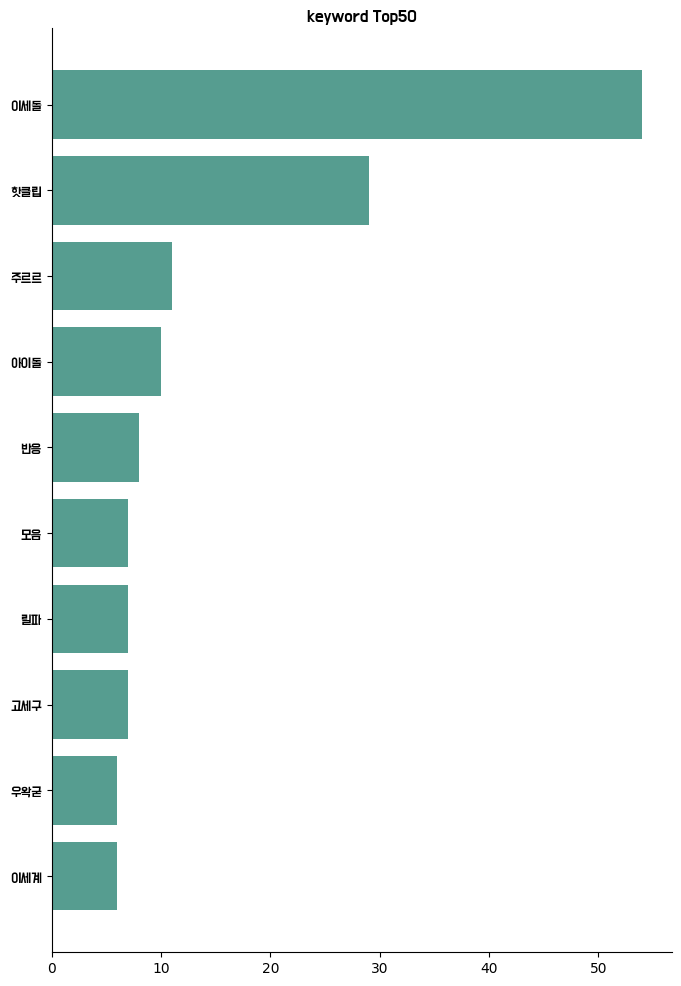

In [ ]:
# #
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/BMDOHYEON_ttf.ttf"
fontprop = fm.FontProperties(fname=font_path)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

words = sorted(tokenizer.word_counts.items(), key=lambda x: x[1])
x = [i[0] for i in words[-10:]]
y = [i[1] for i in words[-10:]]

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(x, y, color='#569d90')
plt.yticks(fontproperties=fontprop, fontsize=8)  # 폰트 설정을 추가
plt.title("keyword Top10", fontproperties=fontprop)  # 폰트 설정을 추가
simpleaxis(ax)



## 중간결론
### 마인크래프트
* 수익(benefit)으로 보았을때나 반응면으로 보았을때나 건축 콘테스트, 왁파트, 눕프로 해커 같은 주제들이 최상위 keyword에 올라가있다.
* 마인크래프트에 '고멤'이라는 키워드가 들어간 경우, 마인크래프트의 평균 이상의 댓글이 달린다. 👉 조회수나 수익면에서 부족하지만 '댓글' 이라는 시청자 반응면에서 꽤 높다.

### ISEGYE IDOL : YOUTUBE
* (benefit) 핫클립 위주의 영상이 많고, '반응 모음' keyword 들의 영상이 상위권 안에있다. '같이 보기' 같은 컨텐츠

* (조회수,reaction) 모든 이세돌 멤버분들이 keyword 에 있지만 특히, 눈에띄게 보이는 keyword 는  '주르르' '고세구' 이다.



### 풀영상
* (benefit, 조회수 , reaction) 풀영상의 경우  vr챗, 합방, 고멤, 상황극, 그리고 매년마다 유행타는 게임 (어몽어스 같은)류 들이 상위권에 있었다.

> 아쉽게도 다른 재생목록들을 보았을 때, 키워드들이 나오긴 하지만, 많은 양의 키워드를 볼 수는 없었다. title 보다 해당 영상의 댓글을 가져와야 더 정확한 분석이 가능할것 같다.



# 왁타버스 + 우왁굳의게임방송


In [ ]:
# 추정수익 계산

df = pd.read_csv('/content/dataset (1).csv')

def benfit_cal(df):

    df['ad_count'] = 1
    df.loc[df['seconds'] >= 480,'ad_count'] = 2
    df.loc[df['seconds'] >= 1800,'ad_count'] = 4

    df['ad_benefit'] = (3500 * (df['view_count'] * 0.6) / 1000) * 0.55

    df.loc[df['playlist_title'] == 'shorts', 'ad_benefit'] = (120 * df['view_count'] * 1 / 1000) * 0.55
    df.loc[df['title'].str.contains('COVER|cover|Cover|OST'), 'ad_benefit'] = 0

    df['cost'] = (df['seconds']/60) * 30000
    df.loc[df['seconds'] > 1500, 'cost'] = 100000


    df['benefit'] = df['ad_benefit'] - df['cost']

    df['ad_benefit'] = df['ad_benefit'].astype(int)
    df['cost'] = df['cost'].astype(int)
    df['benefit'] = df['benefit'].astype(int)
    df['reaction'] = df['like_count'] + df['comment_count']

    return df

df = benfit_cal(df)
# df = df[~df['playlist_title'].str.contains('MUSIC')]
df.loc[df['playlist_title'].str.contains('YOUTUBE|이세여고|OFFICIAL'), 'playlist_title'] = 'ISEGYE_IDOL_예능' # 이세돌 카테고리 통합
# df.loc[df['playlist_title'].str.contains('WAKTAVERSE'), 'playlist_title'] = 'WAKTAVERSE : 예능'

In [ ]:
# df = df[df['seconds']<=15000]

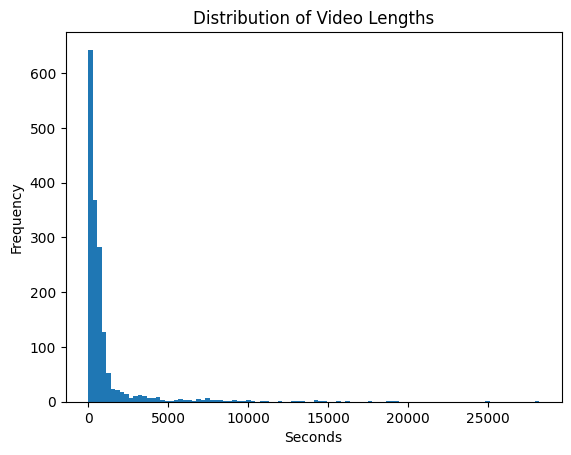

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df[df['year'].isin([2021,2022,2023])]['seconds'], bins=100)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Video Lengths')
plt.show()

In [ ]:
mask = ['view_count','seconds','ad_count','ad_benefit','cost','benefit','comment_count','like_count','reaction']
df_col= df[mask]

Correlation between seconds and benefit: 0.023429700379588345


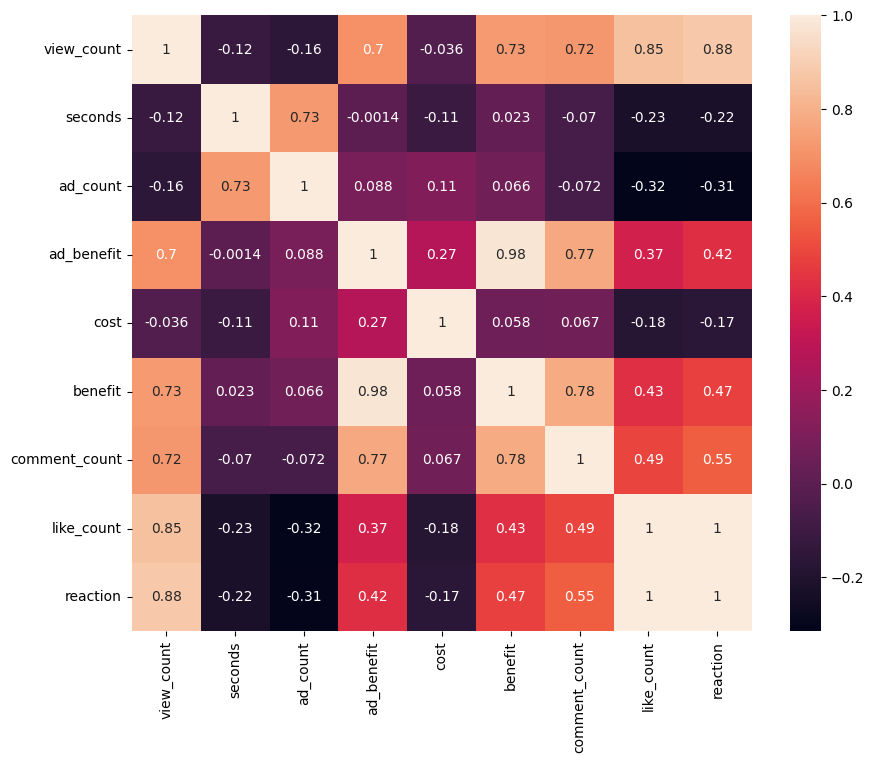

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_col.corr(), annot=True)

correlation = df['seconds'].corr(df['benefit'])
print("Correlation between seconds and benefit:", correlation)

# 영상길이와 benefit 상관관계는 낮다.
# 예상할수 있듯이
# view_count 와 reaction(comment_count + like_count)
# view_count 와 benfit 상관계수가 높다. 역시 조회수가 중요하다.


In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_col, figsize=(8, 8), diagonal='hist', alpha=0.8)
plt.show()


In [ ]:
import scipy.stats as stats
rho, p_val = stats.pearsonr(df_col['seconds'], df_col['benefit'])
print(f"결과: {rho},p-value {p_val}")

결과: 0.12248232491930611,p-value 0.00035889620731041795


###✔️ 조회수, 시청자들의 반응 reaction (댓글수+좋아요), 수익 상관관계
* 역시 생각했던 것 처럼. '조회수' ,'시청자 반응'이 수익과 상관계수가 높았다.  생각보다 '좋아요'와'댓글수'의 상관계수가 엄청 높지는 않았다.

###✔️  영상의 길이와 수익의 상관관계
* 보통 2000초 아래의 영상들이 대부분이다.
* seconds 와 benfit 의경우 상관계수 값이 0.1 로 그렇게 큰 상관관계가 있지는 않았다. p-value 0.02

# 재생목록별로 좋아요, 댓글수, 수익에 차이가 있을까?
>  왁타버스(서브채널) 와 우왁굳게임방송(본채널)의 대표 컨텐츠들을 가져와서
* 수익측면과 리액션측면에서 어떤 차이가 있는지 분석해보자.
*  각 목표변수별로 영향을 받는 독립변수들이 무엇인지 찾아보자.


In [111]:
df.sort_values(by='date', ascending=False)

,publishedAt,title,video_id,view_count,like_count,comment_count,channel,playlist_title,date,year,hour,Duration,seconds,cost,ad_count,ad_benefit,benefit,reaction,upload_at
261,2023-08-02 12:17:11+00:00,잠깐나올래 JAZZ 버전,_CvJ0Ue-y6M,46115,3698,244,waktaverse,WAKTAVERSE : MUSIC,2023-08-02,2023,12,PT5M10S,310,155000,1,53262,-101737,3942,0
1281,2023-08-02 12:30:03+00:00,너 합격,5IRP1YQmG1Y,423098,13270,1258,우왁굳의게임방송,vrchat,2023-08-02,2023,12,PT11M,660,330000,2,488678,158678,14528,0
337,2023-08-01 17:29:52+00:00,연봉1억줘도 다니기 싫은 회사 #Shorts,fIHCcVJ72ds,169585,8599,205,우왁굳의게임방송,shorts,2023-08-01,2023,17,PT32S,32,16000,1,11192,-4807,8804,1
429,2023-08-01 17:34:15+00:00,고멤이 그린 그림보고 정신 감정 하기,JukcFdfjmE0,169103,6901,358,waktaverse,WAKTAVERSE : GOMEM,2023-08-01,2023,17,PT9M30S,570,285000,2,195313,-89686,7259,1
149,2023-07-31 13:57:00+00:00,차원을 넘어 이세돌 궁금한 점을 모두 물어보았다,RAlxn4xBN7s,38727,1772,119,waktaverse,ISEGYE_IDOL_예능,2023-07-31,2023,13,PT1H3M9S,3789,100000,4,44729,-55270,1891,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2021-01-03 12:17:08+00:00,역대 팬게임 중에 가장 오래 플레이한 게임 - 왁두 랜덤 디펜스,G8-VtESes0Y,2102639,11427,1690,우왁굳의게임방송,똥겜,2021-01-03,2021,12,PT3H57M42S,14262,100000,4,2428548,2328548,13117,0
43,2021-01-02 17:11:37+00:00,메시의 여행 - Tiny messi,n7TBTE-Ml_k,123735,2186,232,waktaverse,연공전,2021-01-02,2021,17,PT21M12S,1272,636000,2,142913,-493086,2418,1
1587,2021-01-02 09:00:22+00:00,일본여자랑 다메다네 노래 듀엣 했습니다 - VR챗,qCqu09PjlxU,583716,9087,976,우왁굳의게임방송,vrchat,2021-01-02,2021,9,PT9M32S,572,286000,2,674191,388191,10063,0
2031,2021-01-01 10:36:34+00:00,왁파트 옆에 빌라촌이 생겼습니다 - 마인크래프트 왁파트 12화,3wwYNs89Ilo,1427902,18030,1034,우왁굳의게임방송,마크,2021-01-01,2021,10,PT13M8S,788,394000,2,1649226,1255226,19064,0


In [ ]:
# 2021~2023.08 의 영상을 기준으로
df = df[df['year'] > 2020]

In [ ]:
# 업로드 변수 추가
df['upload_at'] = 0
df.loc[df['hour'] > 12,'upload_at'] = 1

<Axes: >

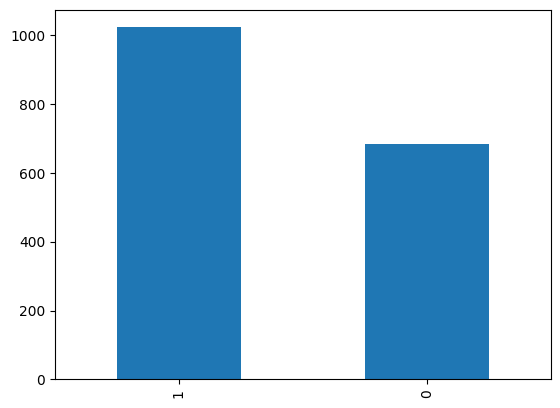

In [ ]:
# 업로드 오전/오후 비율
df['upload_at'].value_counts().plot(kind='bar')

In [ ]:
from scipy.stats import *

all_df = df[['channel','playlist_title','seconds','view_count','like_count','comment_count','benefit','reaction','upload_at']]

# 먹방/캠방/연공전의 경우 따로 빼서보기 애매한 표본수 때문에 기타 컨텐츠로 합쳐준다.
all_df.loc[all_df['playlist_title'] == '먹방/캠방', 'playlist_title'] = '합방,시리즈,기타 컨텐츠'
all_df.loc[all_df['playlist_title'] == '연공전', 'playlist_title'] = '합방,시리즈,기타 컨텐츠'

# vrchat 컨텐츠는 vr 끼리, gomem/middle 의 경우 왁타버스 예능영상으로 / MUSIC 의 경우 이세계아이돌,왁타버스 뮤직이 나눠져있지만 두 그룹을 나눌 정도로 표본이크지 않아서 합쳐주었습니다.
all_df.loc[all_df['playlist_title'].str.contains('vr'),'playlist_title'] = 'vrchat'
all_df.loc[all_df['playlist_title'].str.contains('GOMEM|MIDDLE'),'playlist_title'] = 'WAKTAVERSE_예능'
all_df.loc[all_df['playlist_title'].str.contains('MUSIC'),'playlist_title'] = 'WAKAVERSE_MUSIC'

# 재생목록 영상이 50개 이상인 컨텐츠들만  (제외된 재생목록: 본채널 핫클립의 경우 50개 미만이라 제외 시켰다.)
all_df = all_df[all_df['playlist_title'].str.contains('MUSIC|마크|똥겜|컨텐츠|노가리|예능|WAKTAVERSE|shorts|vrchat')]

wakta = all_df[all_df['channel'] == 'waktaverse'][['playlist_title','seconds','view_count','like_count','comment_count','benefit','reaction','upload_at']]
wakgood = all_df[all_df['channel'] =='우왁굳의게임방송' ][['playlist_title','seconds','view_count','like_count','comment_count','benefit','reaction','upload_at']]

all_df = all_df.drop('channel', axis=1)


In [ ]:
all_df = all_df[~all_df['playlist_title'].str.contains('MUSIC')]

In [ ]:
group1 = wakgood[wakgood['playlist_title'] == '똥겜']
group2 = wakgood[wakgood['playlist_title'] == '합방,시리즈,기타 컨텐츠']
group3 = wakgood[wakgood['playlist_title'] == '핫클립,하이라이트']
group4 = wakgood[wakgood['playlist_title'] == '노가리']
group5 = wakgood[wakgood['playlist_title'] == '마크']

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(group2, bins=10, color='skyblue', edgecolor='black')

# 제목과 레이블 설정
plt.xlabel('like Count')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()


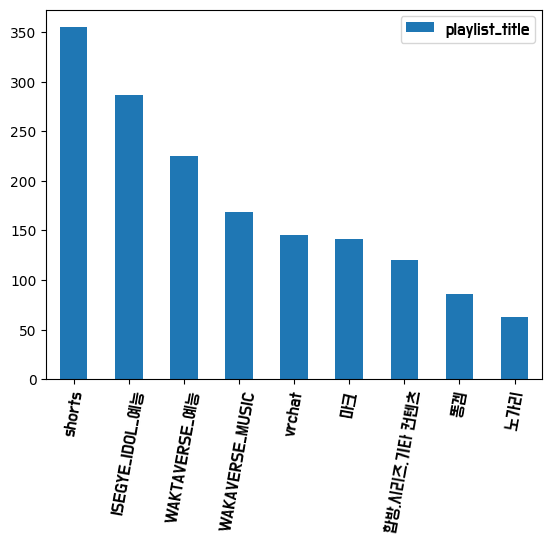

In [ ]:
# 왁타버스 재생목록별 영상 수
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/BMDOHYEON_ttf.ttf"
font = fm.FontProperties(fname=font_path)


all_df['playlist_title'].value_counts().plot(kind='bar')

plt.xticks(rotation=80, fontproperties=font)
plt.legend(prop=font)

plt.show()

## 회귀분석

* 범주형변수 라벨링 연속형변수 정규화


In [ ]:
df_encoded = pd.get_dummies(all_df, columns=['playlist_title'], prefix=['pli'])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# all_df = all_df[['playlist_title','seconds','view_count','like_count','comment_count','benefit']]
variables_to_normalize = ['seconds', 'view_count', 'like_count', 'comment_count', 'benefit']

# 표준화 (Standardization)
scaler = StandardScaler()
df_encoded[variables_to_normalize] = scaler.fit_transform(df_encoded[variables_to_normalize])


In [ ]:
# 대부분 오른쪽으로 치우쳐져있다. 로그화 하기로 결정
df_encoded.skew()

seconds                 6.022752
view_count              6.407811
like_count              4.255413
comment_count          12.562193
benefit                10.761181
reaction                4.404733
upload_at              -0.433878
pli_ISEGYE_IDOL_예능      1.663991
pli_WAKAVERSE_MUSIC     2.558395
pli_WAKTAVERSE_예능       2.060055
pli_shorts              1.331258
pli_vrchat              2.843930
pli_노가리                 4.726236
pli_똥겜                  3.947978
pli_마크                  2.897716
pli_합방,시리즈,기타 컨텐츠       3.218608
dtype: float64

In [ ]:
# 왜도값이 2이상인 변수 선택
var = ['seconds', 'view_count', 'like_count', 'comment_count', 'benefit','reaction']

# 연속형 변수에 로그 변환 적용
df_encoded[var] = np.log1p(df_encoded[var])


In [ ]:
# 로그화 이후 왜도값 , 전보다 치우침이 확실히 적어졌다.
df_encoded.skew()

seconds                2.595621
view_count             0.815713
like_count             0.242122
comment_count          1.600324
benefit                0.665975
reaction               0.277295
upload_at             -0.433878
pli_ISEGYE_IDOL_예능     1.663991
pli_WAKAVERSE_MUSIC    2.558395
pli_WAKTAVERSE_예능      2.060055
pli_shorts             1.331258
pli_vrchat             2.843930
pli_노가리                4.726236
pli_똥겜                 3.947978
pli_마크                 2.897716
pli_합방,시리즈,기타 컨텐츠      3.218608
dtype: float64

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_encoded = df_encoded.fillna(0)

x = df_encoded[['seconds', 'view_count', 'like_count', 'comment_count', 'benefit','reaction']]

def feature_vif(x):
  vif = pd.DataFrame()
  vif['vif_factor'] = [variance_inflation_factor(x.values, i)
                      for i in range(x.shape[1])]
  vif['feature'] = x.columns
  return vif
vif = feature_vif(x)
print(vif)

   vif_factor        feature
0    1.722582        seconds
1    7.568991     view_count
2    6.932494     like_count
3    1.892846  comment_count
4    2.027485        benefit
5    1.399022       reaction


###  Y : benfit (수익)


✔️ 후진 소거법 이용

 제외된 변수 : 'upload_at' ,'pli_WAKTAVERSE_예능', 'pli_ISEGYE_IDOL_예능'


✔️ waktaverse music 의 경우 cover 곡이 대부분, 수익 창출이 불가능하여 제외시켰다.

> 📝요약
* 핵심 컨텐츠 vrchat, 노가리, 마크, 합방기타컨텐츠
그 중에서 "마크" 컨텐츠가 수익측면에서 핵심컨텐츠 이다!
* shorts 의 경우 수익측면에서 좋진 않다. 영상의 길이가 짧기 때문에 들어가는 비용이 낮지만, cpm 도 낮기 때문에 수익측면에서 는 not good
* 그래서 수익은 조회수, 영상의 길이에 영향을 많이 받는다.
* 설명력(R-Sqaure) : 0.479
* 다중공선성 문제 없음

In [87]:
from statsmodels.formula.api import ols
# 변수 이름 수정
df_encoded = df_encoded.rename(columns={
    'pli_합방,시리즈,기타 컨텐츠' : 'pli_합방기타컨텐츠'
    # 다른 변수들도 필요에 따라 수정
})
# reaction = like + comment으로 합쳤을 때

# test =( 'seconds  view_count + like_count  +comment_count + benefit + reaction + upload_at + pli_ISEGYE_IDOL_예능 + pli_WAKAVERSE_MUSIC + pli_WAKTAVERSE_예능 + pli_shorts+pli_vrchat + pli_노가리+pli_똥겜   +pli_마크  +pli_합방,시리즈,기타 컨텐츠 ')



# 최종
# ols('benefit ~ seconds  + reaction  + pli_shorts + pli_vrchat + pli_노가리 + pli_마크 + pli_합방기타컨텐츠', df_encoded).fit().summary()
ols('benefit ~ seconds   + reaction  + pli_ISEGYE_IDOL_예능 + pli_WAKTAVERSE_예능 + pli_shorts + pli_vrchat + pli_노가리 + pli_똥겜 + pli_마크 + pli_합방기타컨텐츠', df_encoded).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                benefit   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     147.7
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          3.14e-218
Time:                        11:25:11   Log-Likelihood:                -728.96
No. Observations:                1591   AIC:                             1480.
Df Residuals:                    1580   BIC:                             1539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.2569      0.143    -29.761      0.000      -4.538      -3.976
seconds                 0.2461      0.025      9.865      0.000       0.197       0.295
reaction                0.4987      0.017     29.392      0.000       0.465       0.532
pli_ISEGYE_IDOL_예능     -0.4695      0.025    -18.798      0.000      -0.519      -0.421
pli_WAKTAVERSE_예능      -0.4259      0.026    -16.114      0.000      -0.478      -0.374
pli_WAKAVERSE_MUSIC    -0.6033      0.035    -17.473      0.000      -0.671      -0.536
pli_shorts             -1.0743      0.035    -30.875      0.000      -1.143      -1.006
pli_vrchat             -0.3354      0.036     -9.362      0.000      -0.406      -0.265
pli_노가리                -0.3196      0.047     -6.852      0.000      -0.411      -0.228
pli_똥겜                 -0.3788      0.040     -9.381      0.000      -0.458      -0.300
pli_마크                 -0.3186      0.037     -8.705      0.000      -0.390      -0.247
pli_합방기타컨텐츠            -0.3315      0.037     -8.956      0.000      -0.404      -0.259
==============================================================================
Omnibus:                      289.835   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2580.593
Skew:                          -0.580   Prob(JB):                         0.00
Kurtosis:                       9.131   Cond. No.                     3.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Y : view_count (조회수)
✔️ 수익과 조회수의 경우 상관계수가 굉장히 높지만. 무조건 수익이 높으면 조회수도 높을것이라고 확신 할 수는 없다. 수익은 낮아도 조회수가 높은 컨텐츠들이 무엇인지 확인해 보았다.


> 📝 요약
* shorts, 마크, Waktaverse:music 순으로 조회수에 큰 영향을 주는 컨텐츠이다. 확실히 쇼츠의 경우 채널의 조회수를 높히는데 좋다.
* Waktaverse, ISEGYE 예능 영상의 경우 아직 까지는 조회수를 높히는데 영향을 주지 못하는것 같다.
* 설명력(R-squared):	0.242
* 다중공선성 문제 없음

In [64]:
# pli_ISEGYE_IDOL_예능 + pli_WAKAVERSE_MUSIC + pli_WAKTAVERSE_예능 + pli_shorts + pli_vrchat + pli_노가리 + pli_똥겜   +pli_마크  +pli_합방기타컨텐츠

ols('view_count ~ seconds + pli_ISEGYE_IDOL_예능 + pli_WAKTAVERSE_예능+ pli_WAKAVERSE_MUSIC + pli_shorts  + pli_마크+ pli_똥겜', df_encoded).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     75.63
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.13e-94
Time:                        10:29:00   Log-Likelihood:                -1268.8
No. Observations:                1591   AIC:                             2554.
Df Residuals:                    1583   BIC:                             2597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1084      0.030     -3.644      0.000      -0.167      -0.050
seconds                 0.1757      0.035      5.076      0.000       0.108       0.244
pli_ISEGYE_IDOL_예능     -0.4301      0.044     -9.812      0.000      -0.516      -0.344
pli_WAKTAVERSE_예능      -0.6562      0.047    -13.992      0.000      -0.748      -0.564
pli_WAKAVERSE_MUSIC     0.1437      0.053      2.727      0.006       0.040       0.247
pli_shorts              0.2678      0.045      5.963      0.000       0.180       0.356
pli_마크                  0.1653      0.054      3.047      0.002       0.059       0.272
pli_똥겜                 -0.2749      0.065     -4.202      0.000      -0.403      -0.147
==============================================================================
Omnibus:                      174.415   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.735
Skew:                           0.717   Prob(JB):                     6.13e-70
Kurtosis:                       4.659   Cond. No.                         7.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Y : reaction (시청자 반응(좋아요,댓글))
✔️ reaction 와 benefit 의 상관관계가 0.44로 크게 크지 않아서 빼지 않았다.

> 📝 요약
* waktaverse : Music, shorts 영상이 시청자 reaction 에 높은 영향을 준다. 그 중 쇼츠가 굉장히 높음
* 영상의 길이가 짧을 수록 시청자 반응이 더 많다
* 설명력(R-squared): 0.582
* 더빈왓슨 통계량 값이 1.6 자기상관이 낮다
* Cond. No.	값이 6.3으로 다중공선성에 문제가 없다.


In [107]:
# 최종식
# pli_ISEGYE_IDOL_예능 + pli_WAKAVERSE_MUSIC + pli_WAKTAVERSE_예능 + pli_shorts + pli_vrchat + pli_노가리 + pli_똥겜   +pli_마크  +pli_합방,시리즈,기타 컨텐츠
# ols('reaction ~ benefit + seconds  + pli_ISEGYE_IDOL_예능 + pli_WAKTAVERSE_예능 +pli_WAKAVERSE_MUSIC + pli_shorts  + pli_마크 ', df_encoded).fit().summary()

ols('comment_count ~ seconds + benefit  + pli_ISEGYE_IDOL_예능 + pli_WAKAVERSE_MUSIC + pli_WAKTAVERSE_예능 + pli_shorts + pli_똥겜 + pli_노가리', df_encoded).fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     175.7
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          3.61e-212
Time:                        11:50:16   Log-Likelihood:                -509.10
No. Observations:                1591   AIC:                             1036.
Df Residuals:                    1582   BIC:                             1085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0033      0.017      0.199      0.842      -0.030       0.036
seconds                -0.0260      0.022     -1.194      0.233      -0.069       0.017
benefit                 0.4042      0.018     22.979      0.000       0.370       0.439
pli_ISEGYE_IDOL_예능     -0.1920      0.027     -7.149      0.000      -0.245      -0.139
pli_WAKAVERSE_MUSIC     0.3998      0.032     12.423      0.000       0.337       0.463
pli_WAKTAVERSE_예능      -0.2444      0.029     -8.413      0.000      -0.301      -0.187
pli_shorts             -0.2271      0.028     -7.982      0.000      -0.283      -0.171
pli_똥겜                 -0.1100      0.040     -2.747      0.006      -0.189      -0.031
pli_노가리                 0.0016      0.046      0.036      0.971      -0.088       0.091
==============================================================================
Omnibus:                      429.282   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1660.805
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       7.320   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""